# IE6511 Homework 4
Done by: Aloisius Stephen and Yang Xiaozhou

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=3)
np.random.seed(6511)

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## Question 1
a) 5 bits, since $0 \geq x \geq 31$ and 5 binary bits can represent up to 31 which is $z = 11111$

b) Switching one of the 5 bit gives a neighborhood solution, so there are a total of 5 possible neighbourhood solutions.

## Question 2
i) $10! = 3628800$

ii) 9

iii) k = 1 <br>
Neighborhood: <br>
(8 9 7 6 5 4 3 2 1 0) <br>
(7 8 9 6 5 4 3 2 1 0) <br>
(6 8 7 9 5 4 3 2 1 0) <br>
(5 8 7 6 9 4 3 2 1 0) <br>
(4 8 7 6 5 9 3 2 1 0) <br>
(3 8 7 6 5 4 9 2 1 0) <br>
(2 8 7 6 5 4 3 9 1 0) <br>
(1 8 7 6 5 4 3 2 9 0) <br>
(0 8 7 6 5 4 3 2 1 9) <br>

iv) pairwise swap with k = 1

v) 10

vi) 10

vii) $10 \times 10 = 100$

    

## Question 3
a) Permutation, whereby the first 5 elements are on Chip1, and the next 5 elements are on Chip2. <br>
Initial configuration: ( 6 7 8 9 10 1 2 3 4 5 )
<br>

<br>
b) Neighborhood definition: choose one element from the first 5 elements, and swap it with one of the element from the second 5 elements. <br>
Examples of feasible neighbours: <br>
i. ( 6 **7** 8 9 10 1 2 **3** 4 5 ) $\Rightarrow$ ( 6 **3** 8 9 10 1 2 **7** 4 5 ) <br>
ii. ( 6 7 8 9 **10 1** 2 3 4 5 ) $\Rightarrow$ ( 6 7 8 9 **1 10** 2 3 4 5 )
<br>
<br>
There are a total of $5^2 = 25$ possible vectors in the neighborhood
<br>
<br>
c) <br>
Iteration <br>
1: ( 6 7 8 9 10 1 2 3 4 5 ) initial value <br>
2: ( **3** 7 8 9 10 1 2 **6** 4 5 ) after swapping cell 3 and 6<br>
3: ( 3 7 8 **1** 10 **9** 2 6 4 5 ) after swapping cell 1 and 9<br>
Tabu members of iteration 4: <br>
i. ( 3 7 8 **9** 10 **1** 2 6 4 5 ) swap 1 and 9<br>
ii.( **6** 7 8 1 10 9 2 **3** 4 5 ) swap 3 and 6

## Question 4

In [6]:
def bump(x):

    dimen=np.size(x);

    sum1 = 0
    sum2 = 0
    tim1 = 1
    tim2 = 1
    z = np.zeros(dimen)
    
    for i in range(0,dimen):
        sum1=sum1+np.power(np.cos(x[i]),4)
        sum2=sum2+i*np.power(x[i],2)
        tim1=tim1*np.power(np.cos(x[i]),2)
        tim2=tim2*(x[i])
    for i in range(0,dimen):
        if(0<=x[i] and x[i]<=10):
            z[i]=1
        else:
            z[i]=0
            
    if(any(z) and tim2>=0.75):
        y = np.abs((sum1-2*tim1)/(np.sqrt(sum2)))
    else:
        y=0
    
    return y

In [7]:
def DDS(x_min,x_max,m,x_initial):
    r=0.2
    sBest=x_initial
    sCur=x_initial
    CostBest=bump(sBest)
    dimen=np.size(x_initial)
    Cost_iter = np.zeros(m)
    Iter = np.zeros(m)
    x_range=x_max-x_min
    k=0
    
    for i in range(0,m):
        sCur=sBest
        Iter[i] = np.int(i+1)
        Cost_iter[i]=CostBest
        for j in range(0,dimen):
            if (np.random.rand(1)<(1-(np.log(i+1)/np.log(m+1)))):
                k=k+1
                sCur[j]=sBest[j]+np.random.randn(1,1)*r*(x_range)
                if(sCur[j]<x_min):
                    sCur[j]=x_min+(x_min-sCur[j])
                    if(sCur[j]>x_max):
                        sCur[j]=x_min
                        
                if(sCur[j]>x_max):
                    sCur[j]=x_max-(sCur[j]-x_max)
                    if(sCur[j]<x_min):
                        sCur[j]=x_max
        
            if(k==0):
                index=np.random.randint(0,dimen)
                sCur[index]=sBest[index]+np.random.randn(1,1)*r*(x_range)
                if(sCur[index]<x_min):
                    sCur[index]=x_min+(x_min-sCur[index])
                    if(sCur[index]>x_max):
                        sCur[index]=x_min
                            
                if(sCur[index]>x_max):
                    sCur[index]=x_max-(sCur[index]-x_max)
                    if(sCur[index]<x_min):
                        sCur[index]=x_max
            k=0
            if(bump(sCur)>CostBest):
                sBest=sCur
                CostBest=bump(sBest)
    sol = pd.DataFrame(np.column_stack((Iter,Cost_iter)), columns = ['Iteration','Cost'])
    return sol 

In [10]:
x_init = 10*np.random.rand(20)
trial = 20
itr = 500
Trial_best = DDS(0,10,itr,x_init)

for i  in range(1,trial):
    Trial_best = Trial_best.append(DDS(0,10,itr,x_init)) 


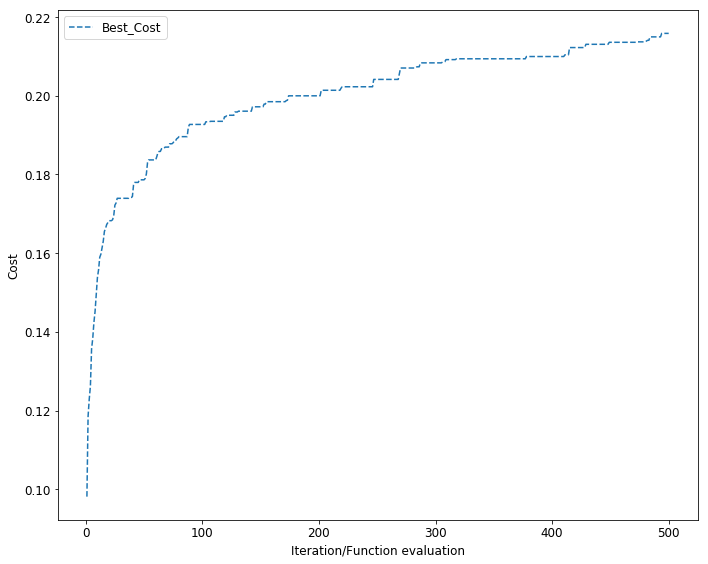

In [11]:
#average of Best_Cost plot
plt.figure(figsize=[10,8])
plt.plot(Trial_best.groupby('Iteration').mean().Cost, '--')
plt.xlabel('Iteration/Function evaluation')
plt.ylabel('Cost')
plt.legend(['Best_Cost'])
plt.tight_layout()

## Question 5
a)
![Q5nondominatedsolutions.JPG](https://github.com/aloisiusStephen/IE6511_HW/blob/master/HW4/Q5%20nondominated%20solutions.JPG?raw=true)

There are 7 non-dominated solutions

The tradeoff curve is not convex based on the current set of solutions.

Yes because the pareto front generated through such a method will be convex, which may not apply to the true pareto front.

b)
School: <br>
1. University of Disney Land non-dominated
2. Bedlam College non-dominated 
3. Hard Knocks U non-dominated 
4. Space Cadet Academy dominated by University of Disney Land

Therefore the Pareto-optimal set of schools is: <br>
University of Disney Land, Bedlam College, Hard Knocks U 

## Question 6
a) Non-dominated sorting, fronts: <br>
$F_1 = \{ d,4,5 \}$ <br>
$F_2 = \{ c,e,3,2 \}$ <br> 
$F_3 = \{ a,b,1 \}$ <br>
$F_4 = \{ f\}$ <br>
$F_5 = \{ 6\}$ <br>

The first 3 parents are taken from $F_1$ and then the other 3 are selected by the crowding distance.
For f1, Crowding distance, $d_x$: <br>
$d_c = \infty$ Since c is boundary solution <br>
$d_e = (f1^{(3)}-f1^{(c)}/(f1^{max}-f1^{min})= (8-4)/(20-0) = 0.2$ <br>
$d_3 = (f1^{(2)}-f1^{(e)}/(f1^{max}-f1^{min})= (12-5)/(20-0) = 0.35$ <br>
$d_2 = \infty$ Since 2 is boundary solution<br>

For f2, Crowding distance, $d_x$: <br>
$d_c = \infty$ Since c is boundary solution <br>
$d_e = 0.2+(f2^{(3)}-f2^{(c)}/(f2^{max}-f2^{min})= 0.2+(4-1)/(10-0) = 0.5$ <br>
$d_3 = 0.35+(f2^{(2)}-f2^{(e)}/(f2^{max}-f2^{min})= 0.35+(7-3)/(10-0) = 0.75$ <br>
$d_2 = \infty$ Since 2 is boundary solution <br>
$\Rightarrow d_c = d_2 > d_3 > d_e$

Therefore $\{ c,3,2\}$ are selected from $F_2$ <br>
The parent population for generation t+1 is $\{d,4,5,c,3,2\}$

b) The mating pool is $\{f,2,c,e,5,3\}$ since the Front 1 will be picked given that it has a better rank than Front 2. Amongst the Front 2, $\{e,5,3\}$ are selected because they have the larger Crowding Distance values as compared to solution $a$. 

c)
<table>
  <tr>
    <th> </th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
  </tr>
  <tr>
    <td>1</td>
    <td bgcolor = "#000000"> </td>
    <td>Non-dominated</td>
    <td>Non-dominated</td>
    <td>1 dominates 4</td>
  </tr>
  <tr>
    <td>2</td>
    <td bgcolor = "#000000"> </td>
    <td bgcolor = "#000000"> </td>
    <td>Non-dominated</td>
    <td>Non-dominated</td>
  </tr>
  <tr>
    <td>3</td>
    <td bgcolor = "#000000"> </td>
    <td bgcolor = "#000000"> </td>
    <td bgcolor = "#000000"> </td>
    <td>Non-dominated</td>
  </tr>
  <tr>
    <td>4</td>
    <td bgcolor = "#000000"> </td>
    <td bgcolor = "#000000"> </td>
    <td bgcolor = "#000000"> </td>
    <td bgcolor = "#000000"> </td>
  </tr>
</table>

Therefore points 1,2,3 are the Pareto front since all of these points are non-dominated by any of the other points.
